# Applying labs to our dataset
## Lab 1

In [121]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [122]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [123]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot: title={'center': 'math score'}>,
        <AxesSubplot: title={'center': 'reading score'}>],
       [<AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: >]], dtype=object)

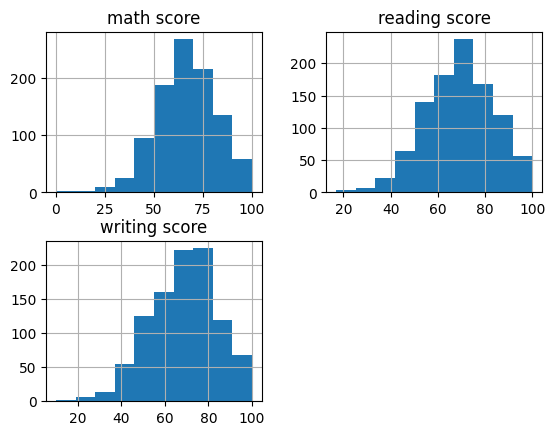

In [124]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot: xlabel='math score', ylabel='reading score'>

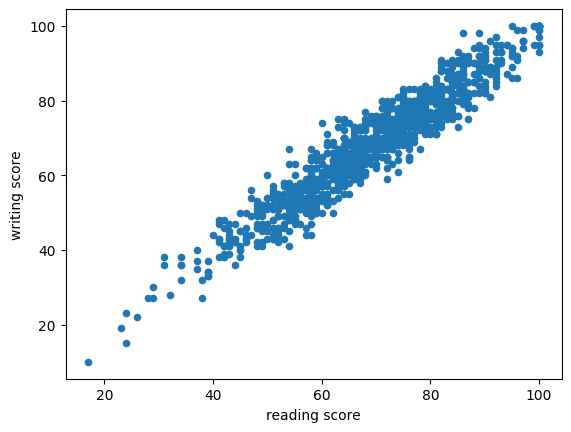

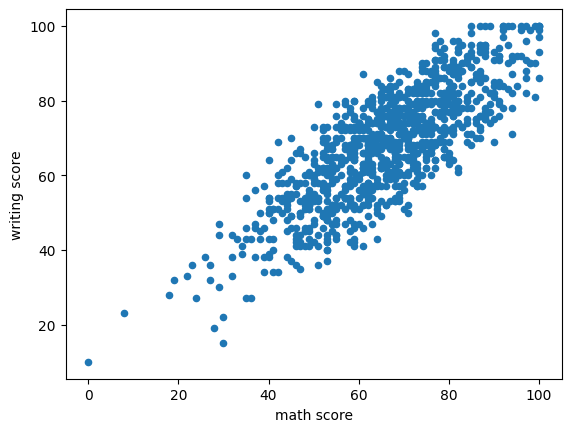

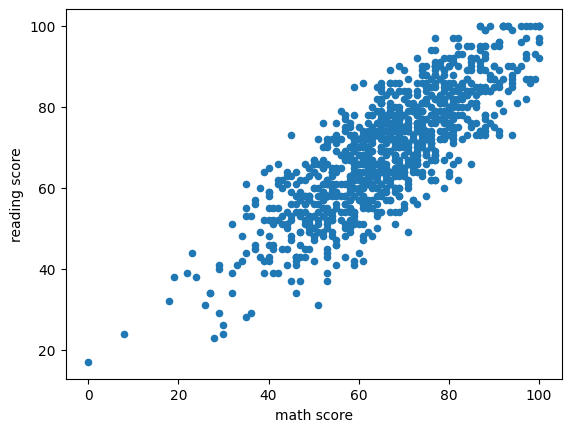

In [125]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Getting started with sci-kit learn :). The first part of this lab is not applicable to our dataset. However, in machine-learning/p2.ipynb, I went through it all with the MNIST dataset. 

### Pre-processing of the data 
First, turn all the categorical data into numerical data. Then normalize it and sort it into train and test data. 

In [126]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Turning categorical data into numerical data. We need ordinal encoding for all categorical values with a natural ordering and one-hot encoding for all data without any natural ordering.  
1. **Ordinal encoding**: Just replace the category by an integer.  
2. **One-hot encoding**: To avoid creating an order between data values that don't have a natural order, add another binary column for each unique value in the column. 

In [127]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [128]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [129]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


Now split the data into X (input) and y (target/outcome). In this case, I'm using the math score as y. 

In [130]:
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()  # Always good to check :) 

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [131]:
y.head()  # Also check y.

,math score
0,72
1,69
2,90
3,47
4,76


After having X and y, we can scale the data and then split the data into a training and a test set. 

In [132]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [133]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

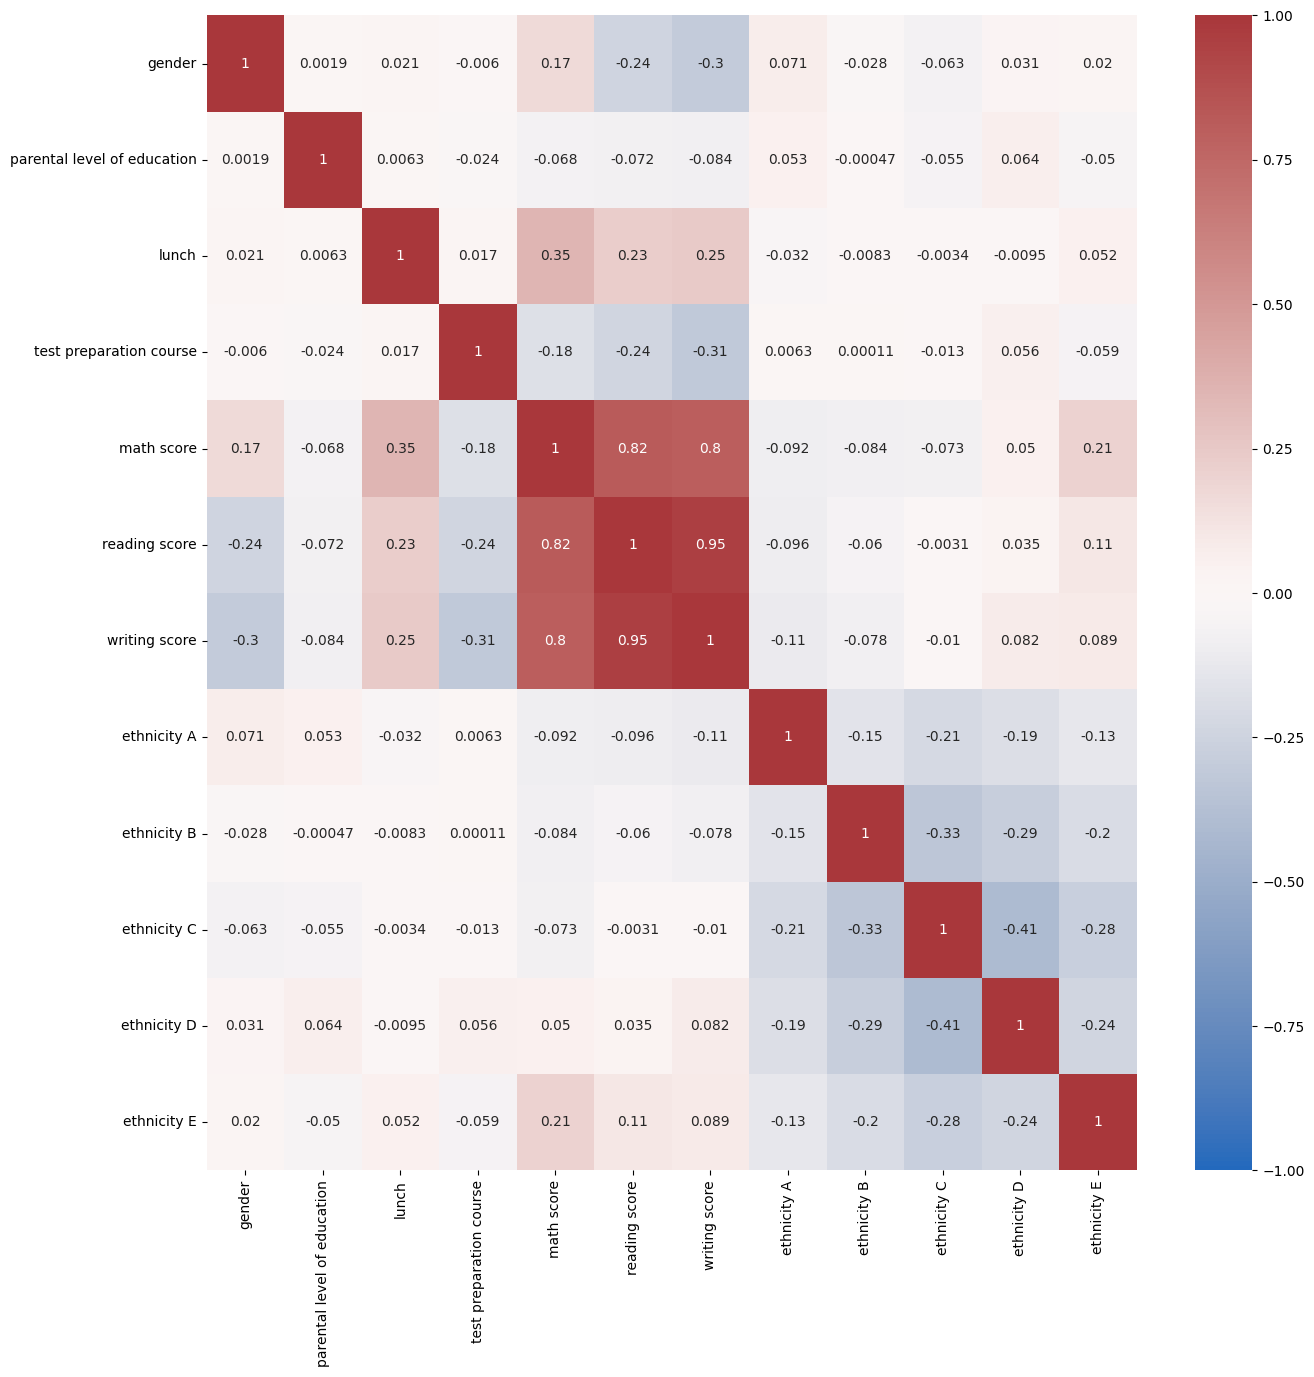

In [134]:
import seaborn as sns 

corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [135]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [136]:
corr_reading = corr_matrix.iloc[5].map(lambda x: abs(x))
corr_reading.sort_values(ascending=False)

reading score                  1.000000
writing score                  0.954598
math score                     0.817580
gender                         0.244313
test preparation course        0.241780
lunch                          0.229560
ethnicity E                    0.106712
ethnicity A                    0.096274
parental level of education    0.072444
ethnicity B                    0.060283
ethnicity D                    0.035177
ethnicity C                    0.003074
Name: reading score, dtype: float64

In [137]:
corr_gender = corr_matrix.iloc[0].map(lambda x: abs(x))  # Correlation for gender. 
corr_gender.sort_values(ascending=False)

gender                         1.000000
writing score                  0.301225
reading score                  0.244313
math score                     0.167982
ethnicity A                    0.071001
ethnicity C                    0.063368
ethnicity D                    0.030566
ethnicity B                    0.028466
lunch                          0.021372
ethnicity E                    0.020302
test preparation course        0.006028
parental level of education    0.001913
Name: gender, dtype: float64

In [138]:
corr_ethnicity_a = corr_matrix.iloc[7].map(lambda x: abs(x))  # Correlation for lunch.
corr_ethnicity_a.sort_values(ascending=False)

ethnicity A                    1.000000
ethnicity C                    0.213923
ethnicity D                    0.186234
ethnicity B                    0.151381
ethnicity E                    0.126110
writing score                  0.110714
reading score                  0.096274
math score                     0.091977
gender                         0.071001
parental level of education    0.053288
lunch                          0.032329
test preparation course        0.006315
Name: ethnicity A, dtype: float64

Split into three datasets containing a different amount of top-correlating features (1, 2, 3) for each class (in total: 3, 6, 9 features). The three classes I've chosen for practice here are `math score`, `gender` and `ethnicity A`. This doesn't necessarily make sense in the real world.

In [139]:
# Top correlating for
## Math score:  writing score,  math score,     gender
## Gender:      writing score,  reading score,  math score
## Ethnicity A: ethnicity C,    ethnicity D,    ethnicity B

data_two_features = df[['writing score', 'ethnicity C']]
data_five_features = df[
    ['writing score', 'math score', 'reading score', 'ethnicity C', 'ethnicity D']
]
data_seven_features = df[[
    'writing score', 
    'math score', 
    'reading score', 
    'ethnicity C', 
    'ethnicity D', 
    'gender', 
    'ethnicity B'
]]
data_seven_features.head()

,writing score,math score,reading score,ethnicity C,ethnicity D,gender,ethnicity B
0,74,72,72,0.0,0.0,0.0,1.0
1,88,69,90,1.0,0.0,0.0,0.0
2,93,90,95,0.0,0.0,0.0,1.0
3,44,47,57,0.0,0.0,1.0,0.0
4,75,76,78,1.0,0.0,1.0,0.0


Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8871303278411871

Now the **Smaller Datasets**:

In [142]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_two_features, df[['math score']]
)
X_five_train, X_five_test, y_five_train, y_five_test = train_test_split(
    data_five_features, df[['gender']]
)
X_seven_train, X_seven_test, y_seven_train, y_seven_test = train_test_split(
    data_seven_features, df[['ethnicity A']]
)

In [143]:
# 2 features. 
lr_two = LinearRegression() 
lr_two.fit(X_two_train, y_two_train)

# lr_two.score(X_two_test, y_two_test)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_two.predict(X_two_test).squeeze()}
)
lr_two.score(X_two_test, y_two_test)

0.6749572385723808

In [144]:
# 5 features predicting the gender. 
from sklearn.linear_model import SGDClassifier
clf_five = SGDClassifier(max_iter=1000, random_state=42) 
clf_five.fit(X_five_train, y_five_train)

# lr_two.score(X_two_test, y_two_test)

acc_five = pd.DataFrame(
    {'Actual': y_five_test.squeeze(), 'Predicted:': clf_five.predict(X_five_test).squeeze()}
)

from sklearn.model_selection import cross_val_score
cross_val_score(clf_five, X_five_train, y_five_train, cv=3, scoring='accuracy')

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

array([0.848, 0.856, 0.724])

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [145]:
# 'lr' is my Linear Regression model for all data trying to predict the math score. 
# Here, I should work with trying to predict the gender, as this is classification and predicting the math score isn't. 
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


In [146]:
X_scaled, y_scaled = scale_min_max(df.drop('gender', axis=1), df[['gender']])
X_scaled.shape

(1000, 11)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [147]:
X_train

array([[1.        , 0.        , 0.        , ..., 0.        , 0.40963855,
        0.45555556],
       [0.        , 0.        , 1.        , ..., 0.        , 0.69879518,
        0.81111111],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1686747 ,
        0.31111111],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 0.92771084,
        0.94444444],
       [0.        , 0.2       , 1.        , ..., 0.        , 0.74698795,
        0.68888889],
       [0.        , 0.6       , 0.        , ..., 1.        , 0.46987952,
        0.48888889]])

In [148]:
from sklearn.linear_model import SGDClassifier

gender_sgd_clf = SGDClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)
gender_sgd_clf.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [149]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = gender_sgd_clf.predict(X_test)

Get the accuracy, TP rate, FP rate, precision, recall, F measure and the ROC area. 

In [150]:
def getMetrics(y_true, y_pred, plot=True):
    # Keeping track of all the metrics. 
    metrics = {}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']
    
    # Confusion Matrix. 
    from sklearn.metrics import confusion_matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    
    # True Positive, False Positive, True Negative, False Negative
    metrics['TP'] = con_matrix[0][0]
    metrics['FP'] = con_matrix[0][1]
    metrics['TN'] = con_matrix[1][1]
    metrics['FN'] = con_matrix[1][0]
    
    # Sensitivity & Specificity
    metrics['sensitivity'] = metrics['TP'] / (metrics['TP'] + metrics['FN'])
    metrics['specificity'] = metrics['TN'] / (metrics['TN'] + metrics['FP'])

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    if plot:
        plt.plot(fpr, tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    # print(pd.DataFrame([metrics]))
    
    return metrics

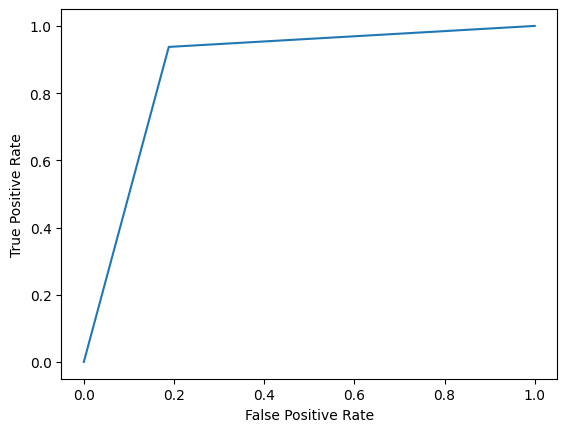

In [151]:
gender_metrics = getMetrics(y_true, y_pred)

In [152]:
precision_recall_fscore_support(y_true, y_pred, average='macro')
# precision_recall_fscore_support(y_true, y_pred, average='micro')
# precision_recall_fscore_support(y_true, y_pred, average='weighted')  # The support is the number of occurrences of each class in y_true.

(0.8713515940727437, 0.8745471014492754, 0.8678964308017487, None)

<AxesSubplot: >

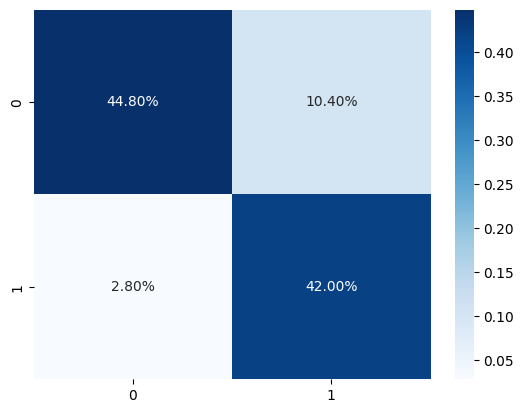

In [153]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5
1. Read the Scikit-Learn library documentation that covers Bayes [nets](https://scikit-learn.org/stable/modules/naive_bayes.html#).
2. Run the *Multinomial Naive Bayes* on your data in your portfolio.

#### Naive Bayes (Scikit Learn)
Different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$. Despite their over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations (document classification & spam filtering). They require a small amount of training data to estimate the necessary parameters. They can be extremely fast. 

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


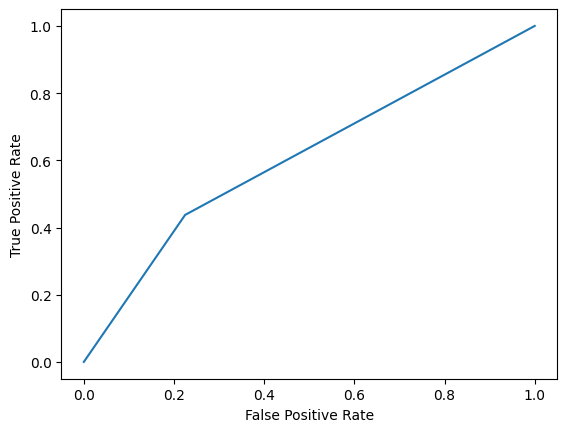

In [154]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
multi_nom_metrics = getMetrics(y_test, multi_nom_y_pred)

#### Gaussian Naive Bayes
The likelihood of the features is assumed to be Gaussian: $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

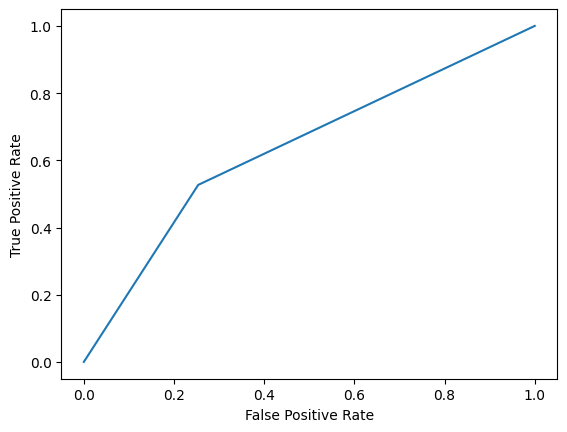

In [155]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_test)
gnb_metrics = getMetrics(y_true, gnb_y_pred)

#### Complement Naive Bayes
CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularaly suited for imbalanced datsets. CNB uses statistics from the complement of each class to compute the model's weights. 

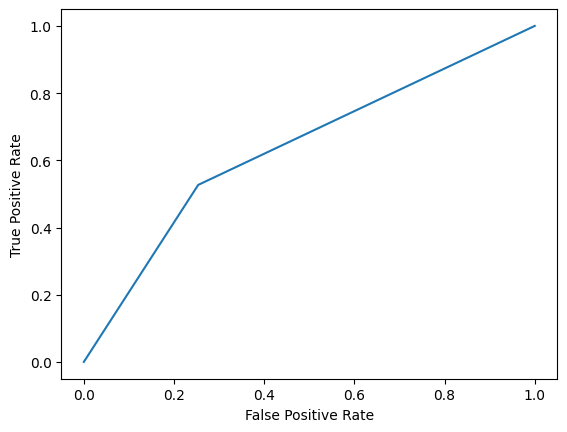

In [156]:
from sklearn.naive_bayes import ComplementNB

cnb = GaussianNB()
cnb_y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_test)
cnb_metrics = getMetrics(y_true, gnb_y_pred)

#### Bernoulli Naive Bayes
This implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions -> there may be multiple freatures but each one is assumed to be a binary-valued variable. Therefore this class requires samples to be represented as binaryvalued feature vectors. 

In [157]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,1.0,0.0,0.68,0.686747,0.711111,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.73,0.602410,0.544444,0.0,0.0,0.0,0.0,1.0
2,0.2,0.0,0.0,0.70,0.614458,0.688889,0.0,0.0,0.0,0.0,1.0
3,0.4,0.0,0.0,0.67,0.734940,0.766667,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.65,0.710843,0.733333,0.0,0.0,1.0,0.0,0.0


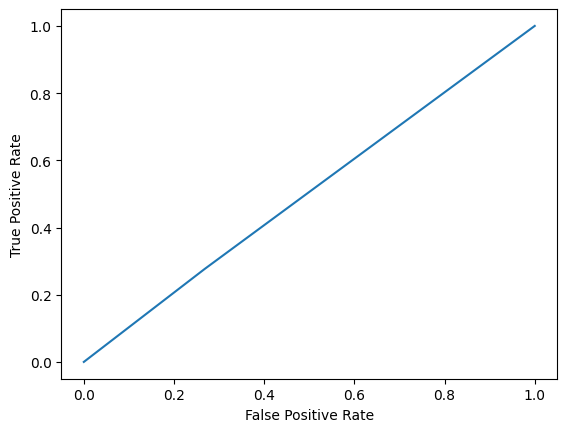

In [158]:
# Get only binary data ['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicities']
# X_binary = X.drop(['reading score', 'writing score'], axis=1)

# X_binary_scaled, y_binary_scaled = scale_min_max(X, y)
# X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_scaled, y_scaled)

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_y_pred = bnb.fit(X_train, y_train.ravel()).predict(X_test)
bnb_metrics = getMetrics(y_true, bnb_y_pred)

In [159]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,1.0,0.0,0.68,0.686747,0.711111,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.73,0.602410,0.544444,0.0,0.0,0.0,0.0,1.0
2,0.2,0.0,0.0,0.70,0.614458,0.688889,0.0,0.0,0.0,0.0,1.0
3,0.4,0.0,0.0,0.67,0.734940,0.766667,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.65,0.710843,0.733333,0.0,0.0,1.0,0.0,0.0


#### Categorical Naive Bayes
Implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature has its own categorical distribution. For each feature i in training set X, CNB estimates a categorical distribution for each feature i of X condititioned on the class y.

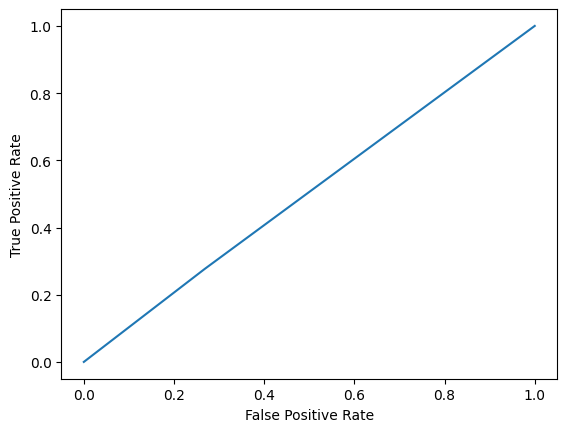

In [160]:
from sklearn.naive_bayes import CategoricalNB
catnb = CategoricalNB()
catnb_y_pred = catnb.fit(X_train, y_train.ravel()).predict(X_test)
catnb_metrics = getMetrics(y_true, bnb_y_pred)

In [161]:
# DataFrame containing metrics from different models:
## Stochastic Gradient Descent Classifier
## Multinomial Naive Bayes
## Gaussian Naive Bayes
## Complement Naive Bayes
## Bernoulli Bayes
## Categorical Bayes
metrics_comparison = pd.DataFrame(
    [gender_metrics, multi_nom_metrics, gnb_metrics, cnb_metrics, bnb_metrics, catnb_metrics],
)
metrics_comparison

,accuracy,TP,FP,TN,FN,sensitivity,specificity,precision,recall,f1-score,roc-area
0,0.868,112,26,105,7,0.941176,0.801527,0.801527,0.937500,0.864198,0.874547
1,0.624,107,31,49,63,0.629412,0.612500,0.612500,0.437500,0.510417,0.606431
2,0.648,103,35,59,53,0.660256,0.627660,0.627660,0.526786,0.572816,0.636581
3,0.648,103,35,59,53,0.660256,0.627660,0.627660,0.526786,0.572816,0.636581
4,0.528,101,37,31,81,0.554945,0.455882,0.455882,0.276786,0.344444,0.504335
5,0.528,101,37,31,81,0.554945,0.455882,0.455882,0.276786,0.344444,0.504335


#### Complex Bayesian Networks

In [162]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

student = BayesianNetwork([('diff', 'grades'), ('intel', 'grades')])

ModuleNotFoundError: No module named 'pgmpy'

# Lab 5
Clustering. Unsupervised Learning. 

In [ ]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

random_state = 42

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [ ]:
# The columns of X_train: 
# gender
# parental level of education
# lunch
# test preparation course
# ethnicity A
# ethnicity B
# ethnicity C
# ethnicity D
# ethnicity E
# reading score
# writing score

# Just keep the reading and writing score for the kmeans algorithm
X_k_means = X[['reading score', 'writing score']].to_numpy()
X_train_reading_writing, X_test_reading_writing = train_test_split(X_k_means)

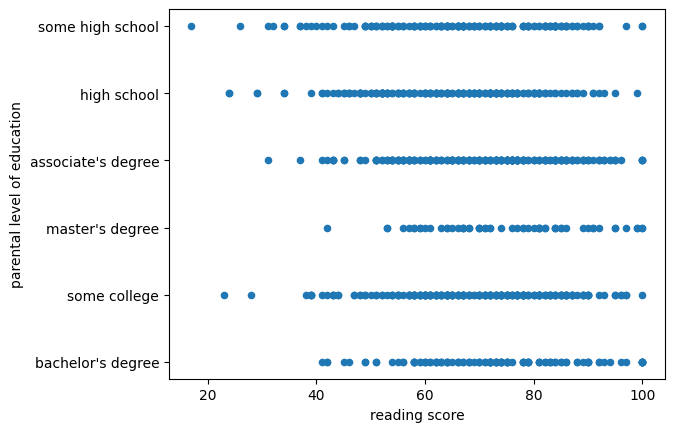

In [ ]:
data.plot(x='reading score', y='parental level of education', kind='scatter')

X_k_means = X[['reading score', 'parental level of education']].to_numpy()
X_train_reading_education, X_test_reading_education = train_test_split(X_k_means)

Let's train a K-Means clusterer on our dataset. It will try to find each cluster's centeroid and assign each instance to the closest centeroid's class.  
`fit_predict` Computes cluster centeroids and predicts cluster index for each sample  
`kmeans.fit_predict`: Check this out. 

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train_reading_writing)

In [ ]:
kmeans.cluster_centers_[0]

array([66.89333333, 66.17777778])

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

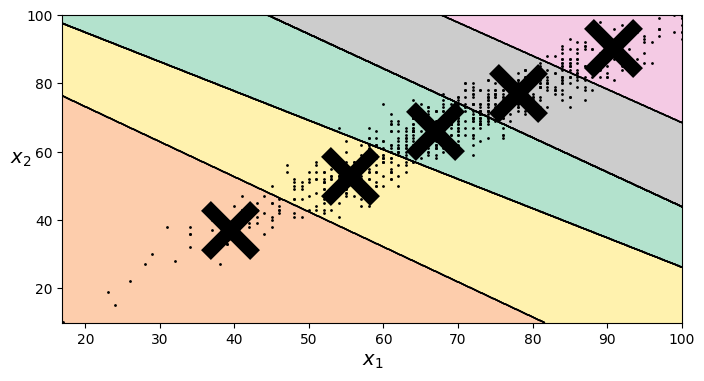

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train_reading_writing)
plt.show()

In [ ]:
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X_train_reading_writing)
kmeans_iter2.fit(X_train_reading_writing)
kmeans_iter3.fit(X_train_reading_writing)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

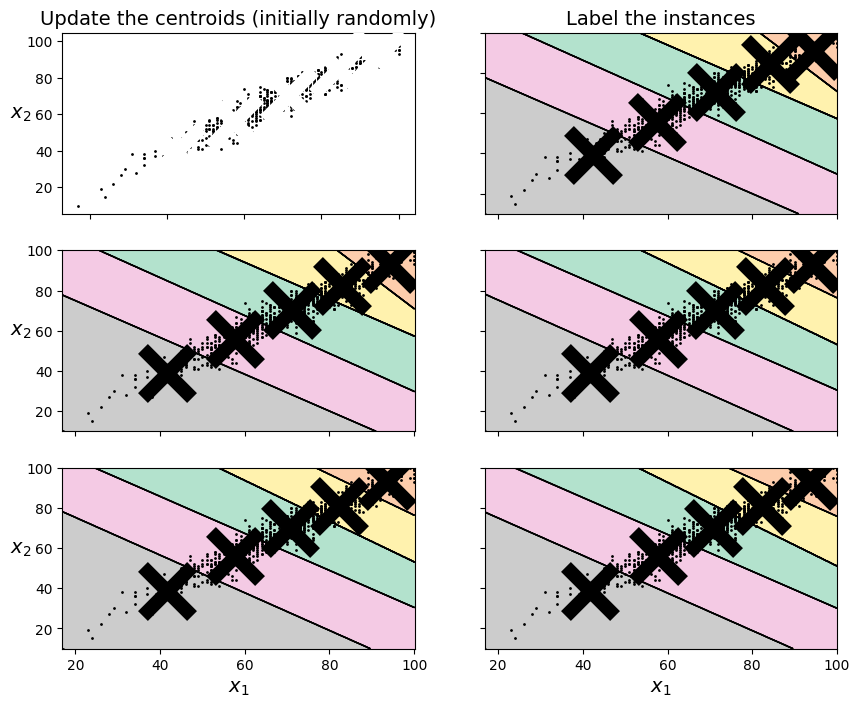

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_train_reading_writing)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_train_reading_writing, show_ylabels=False)

plt.show()

#### Clustering for reading - parental level of education

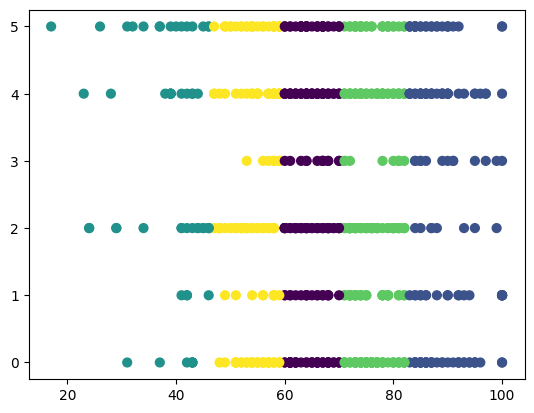

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=random_state)
labels = kmeans.fit_predict(X_train_reading_education)

plt.scatter(X_train_reading_education[:, 0], X_train_reading_education[:, 1], c=labels, s=40, cmap='viridis')

#### Inertia (dt. Trägheit, Untätigkeit, Schwerfälligkeit)
To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instacne and its centroid. This is the idea behind the inertia metric. 

In [ ]:
kmeans.inertia_

# This is how you calculate inertia
X_dist = kmeans.transform(X_train_reading_writing)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

3724904.2343535107

#### Finding the optimal number of clusters

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

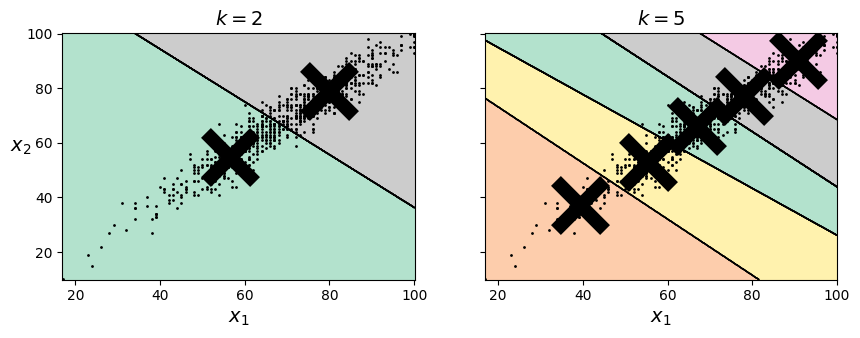

In [ ]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k5 = KMeans(n_clusters=5, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k5, X_train_reading_writing, "$k=2$", "$k=5$")
plt.show()

In [ ]:
kmeans_k2.inertia_

123751.3594691535

In [ ]:
kmeans_k5.inertia_

31446.131928241575

### Gaussian Mixture Model
To learn Gaussian Mixture Models (diagonal, sperical, tied and full covariance matrices supported). 

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=k, random_state=random_state).fit(X_train_reading_writing)
gm.means_

array([[56.83764835, 54.21845705],
       [78.40208438, 77.40908386],
       [43.24705196, 41.90312959],
       [67.99618712, 67.1413122 ],
       [89.56462195, 89.44408224]])

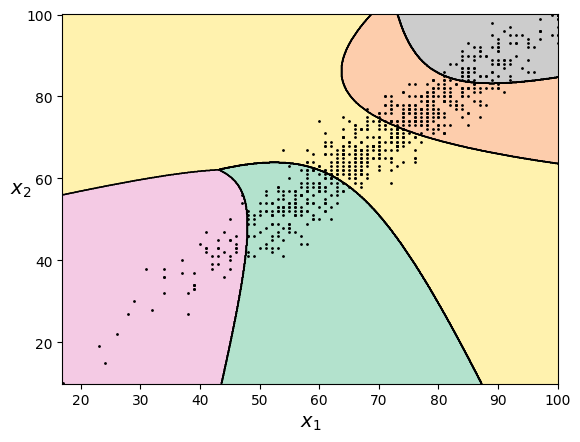

In [ ]:
plot_decision_boundaries(gm, X_train_reading_writing, show_centroids=False)

### Agglomerative Clustering
Recursively merges pairs of clusters of sample data. The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
ac = ac.fit(X_train_reading_writing)

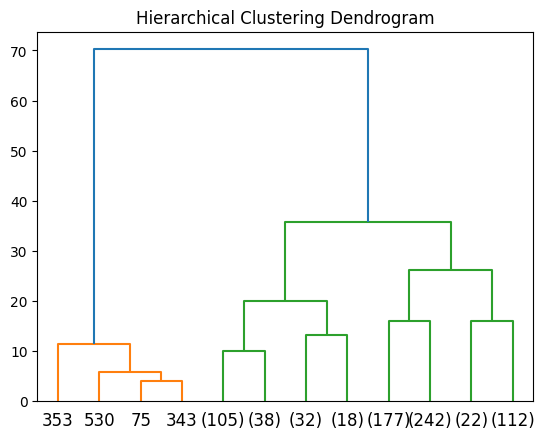

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, truncate_mode='level', p=3)

### Affinity Propagation
creates clusters by sending messages between paris of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. 

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(random_state=42).fit(X_train_reading_writing)
ap_cluster_centers_indices = ap.cluster_centers_indices_
ap_labels = ap.labels_
ap_n_clusters_ = len(ap_cluster_centers_indices)

### Elbow method
Applies K-Means with a different number of clusters while recording the sum of squared errors. 

In [ ]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_reading_writing)
    sse.append(kmeans.inertia_)
    
# Create a dataframe containing the number of clusters and the associated sums of squared error
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,333811.318667
1,2,123751.359469
2,3,68285.868925
3,4,45501.752711
4,5,31377.392354


Text(0, 0.5, 'Inertia')

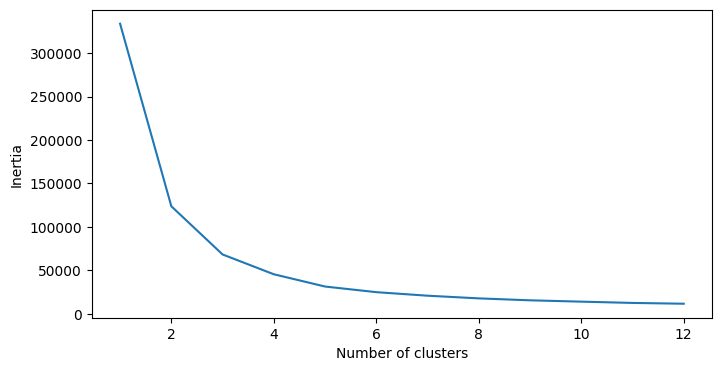

In [ ]:
# Plot the elbow method. 
plt.figure(figsize=(8, 4))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# Now let's find the correct elbow point 
from kneed import KneeLocator

kl = KneeLocator(range(1, 13), sse, curve='convex', direction='decreasing')
kl.elbow

3

### Hard Clustering vs Soft Clustering
Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. 

## Lab 7
Decision Trees. 

The smiley faces dataset contains 144 unique images of dimensions 9x9x1 
belonging to 2 categories (happy and sad).
The file "smiley_X.npy" contains the images.
The file "smiley_Y.npy" contains the corresponding classes (0 for sad, 1 
for happy).
They are serialized with numpy, to load use:
```
X = np.load('path/to/smiley_X.npy')
```

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_original = np.load('./data/smiley_X.npy')
y_original = np.load('./data/smiley_y.npy')

In [ ]:
X = np.reshape(X_original, (len(X_original), -1))  # Get rid of the class attribute
y = y_original

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(108, 81)

In [ ]:
def get_metrics(name, y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics = pd.DataFrame()
    metrics['Decision Tree description'] = [name]

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = [accuracy_score(y_true, y_pred)]
    
    # Confusion Matrix. 
    from sklearn.metrics import confusion_matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    
    # True Positive, False Positive, True Negative, False Negative
    tp = con_matrix[0][0]
    fp = con_matrix[0][1]
    tn = con_matrix[1][1]
    fn = con_matrix[1][0]
    
    # Sensitivity & Specificity
    metrics['sensitivity'] = tp / (tp + fn)
    metrics['specificity'] = tn / (tn + fp)

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = [precision_score(y_true, y_pred)]
    metrics['recall'] = [recall_score(y_true, y_pred)]

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = [f1_score(y_true, y_pred)]

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = [roc_auc_score(y_true, y_pred)]
    
    return metrics

In [ ]:
def compute_metrics(name, clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    metrics = pd.DataFrame()
    # accuracy, TP, FP, TN, FN, sensitivity, specificity, precall, f1-score, roc-area
    metrics = get_metrics(name, y_test, y_pred)
    
    # 10-fold cross validation
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
    metrics['Cross validation accuracy'] = cross_val_scores.mean()
    metrics['Cross validation st. deviation'] = cross_val_scores.std()
    
    return metrics

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

A node's gini attribute measures its impurity. A node is 'pure' (gini = 0) if all training instances it applies to belong to the same class. The gini impurity of node n:  
$ G_i = 1 - \sum p<i, k>^2 $  
* p<i, k> is the ratio of class k instances among the training instances in the ith node. 

In [ ]:
outcomes = pd.DataFrame()  # Save the outcomes to a table.

#### Table of different classifier settings

max depth of 2, splitter = best


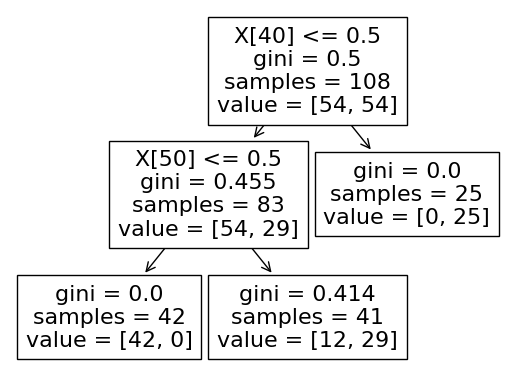

In [ ]:
# Decision Trees with max depth 2: 
max_depth = 1
tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
outcomes = compute_metrics('max depth of 1, splitter = best', tree_clf)

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
outcomes = pd.concat([outcomes, compute_metrics('max depth of 2, splitter = best', tree_clf)], axis=0)
print('max depth of 2, splitter = best')
plot_tree(tree_clf)

tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, splitter='random')
outcomes = pd.concat([outcomes, compute_metrics('max depth of 2, splitter = random', tree_clf)], axis=0)

tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, max_leaf_nodes=2)
outcomes = pd.concat([outcomes, compute_metrics('max depth of 2, max leaf nodes = 2', tree_clf)], axis=0)

tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, min_samples_leaf=10)
outcomes = pd.concat([outcomes, compute_metrics('max depth of 2, min samples for a leaf: 10', tree_clf)], axis=0)

tree_clf = DecisionTreeClassifier(random_state=42, max_features=10)
outcomes = pd.concat([outcomes, compute_metrics('max number of features for a split: 10', tree_clf)], axis=0)

max_depth = 3
tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
outcomes = pd.concat([outcomes, compute_metrics('max depth of 3, splitter = best', tree_clf)], axis=0)

tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, min_samples_leaf=10)
outcomes = pd.concat([outcomes, compute_metrics('max depth of 3, min samples for a leaf: 10', tree_clf)], axis=0)

Using the best working parameters, repeat the experiment, but this time use training and testing data sets. 

In [ ]:
# Pruning the tree: 
# Minimal cost complexity pruning recurisvely find the node with the weakest link. The wekaest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. 
tree_clf = DecisionTreeClassifier(random_state=42)
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
outcomes = pd.concat([outcomes, compute_metrics('max depth of 2, after pruning', clfs[-3])], axis=0)

In [ ]:
outcomes

,Decision Tree description,accuracy,sensitivity,specificity,precision,recall,f1-score,roc-area,Cross validation accuracy,Cross validation st. deviation
0,"max depth of 1, splitter = best",0.805556,0.72,1.0,1.0,0.611111,0.758621,0.805556,0.649091,0.094405
0,"max depth of 2, splitter = best",1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,0.832727,0.151641
0,"max depth of 2, splitter = random",1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,0.832727,0.151641
0,"max depth of 2, max leaf nodes = 2",0.805556,0.72,1.0,1.0,0.611111,0.758621,0.805556,0.649091,0.094405
0,"max depth of 2, min samples for a leaf: 10",1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,0.832727,0.151641
0,max number of features for a split: 10,1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
0,"max depth of 3, splitter = best",1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
0,"max depth of 3, min samples for a leaf: 10",1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,0.972727,0.081818
0,"max depth of 2, after pruning",1.000000,1.00,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
X = X_original[:,:,:,0]
40%9

4

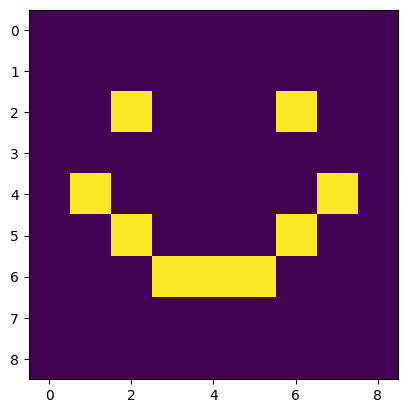

In [ ]:
plt.imshow(X[0], cmap='viridis')

## Lab 8

In [ ]:
from sklearn.metrics import mean_squared_error

def comparePred(true, pred):
    MSE = mean_squared_error(true, pred)
    print("MSE: ", MSE)    
    count = 0
    for p in pred:
        print("True: ", true[count], "\t Predicted: ", p)
        count = count + 1

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_test)

comparePred(y_test, y_pred)

MSE:  0.025720766594499542
True:  0.0 	 Predicted:  0.14018261869700566
True:  1.0 	 Predicted:  0.8971567788742728
True:  0.0 	 Predicted:  0.16413634011714828
True:  0.0 	 Predicted:  -0.11514168890721155
True:  0.0 	 Predicted:  0.10480899387769194
True:  1.0 	 Predicted:  1.0371810192150186
True:  1.0 	 Predicted:  0.876700660881358
True:  1.0 	 Predicted:  1.2182517256707972
True:  1.0 	 Predicted:  1.2054499315963045
True:  1.0 	 Predicted:  0.8631813316131393
True:  1.0 	 Predicted:  0.8452470818113855
True:  1.0 	 Predicted:  0.8024372872596739
True:  0.0 	 Predicted:  0.11697756950152605
True:  0.0 	 Predicted:  0.2872775849000953
True:  1.0 	 Predicted:  0.8613831042191342
True:  1.0 	 Predicted:  0.808586391265119
True:  1.0 	 Predicted:  1.169676256941166
True:  1.0 	 Predicted:  0.8466926604041389
True:  0.0 	 Predicted:  0.1383669229537644
True:  1.0 	 Predicted:  0.8202767121130587
True:  1.0 	 Predicted:  1.0150579722910749
True:  1.0 	 Predicted:  1.024379225140526
Tru

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_class = SGDClassifier()
sgd_class.fit(X_train, y_train)

y_pred = sgd_class.predict(X_test)

comparePred(y_test, y_pred)

MSE:  0.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train,y_train)

comparePred(y_test, y_pred)

MSE:  0.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  1.0 	 Predicted:  1.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True:  0.0 	 Predicted:  0.0
True

## Lab 9

In [1]:
# %pip install tensorflow
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [2]:
X = np.load('./data/smiley_X.npy')
y = np.load('./data/smiley_y.npy')

X = X[:,:,:,0]  # Remove class attribute

X_test = X.copy()
y_test = y.copy()
# X = np.reshape(X, (len(X), -1))  # Get rid of the class attribute

# X_test = X[:,:,:,0]
print(X_test.shape)
print(y_test.shape)

X_valid, X_train = X[:20], X[20:]
y_valid, y_train = y[:20], y[20:]


(144, 9, 9)
(144,)


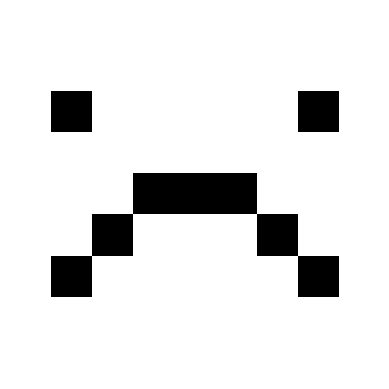

1.0

In [203]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train[0]

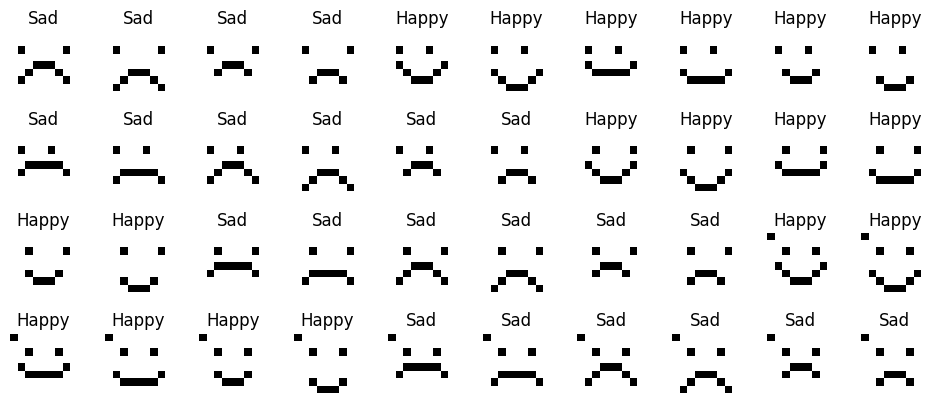

In [204]:
def classify(input):
    return "Happy" if input == 0 else "Sad"

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(classify(y_train[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")     # Need to reduce to one unit in end as we can only have one output
])

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [281]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 81)                0         
                                                                 
 dense (Dense)               (None, 300)               24600     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 54,801
Trainable params: 54,801
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Look at these parameters
model.compile(loss=keras.losses.BinaryCrossentropy(),       # BinaryCrossentropy over categorical crossentropy becase the class is binary
              optimizer=keras.optimizers.SGD(learning_rate=0.01), #"sgd" simply means that we will train the model using simple Stochastic Gradient Descent
              metrics=["accuracy", keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives(), keras.metrics.Precision(), keras.metrics.Recall()])

In [322]:
# Keras models don't work with cross validation from sklearn
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

model_sgd = KerasClassifier(model=model, epochs=30, random_state=42, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model_sgd, X_test, y_test, cv=kfold)  # Says test data but is actually full dataset
print(f"Accuracy using 10-fold cross validation: {results.mean()}")

INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpnylvbvr2\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpo1dln5y6\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpjt7ku055\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmppotr4f44\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpx6xe_677\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpdfjuuj64\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmp4kezhucg\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmp3ehz46tv\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmp6ad33ie1\assets
INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpawj9vjxv\assets
Accuracy using 10-fold cross validation: 0.9519047619047619


In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 1s 86ms/step - loss: 0.7064 - accuracy: 0.4677 - true_positives: 41.0000 - true_negatives: 17.0000 - false_positives: 43.0000 - false_negatives: 23.0000 - precision: 0.4881 - recall: 0.6406 - val_loss: 0.7019 - val_accuracy: 0.4000 - val_true_positives: 5.0000 - val_true_negatives: 3.0000 - val_false_positives: 9.0000 - val_false_negatives: 3.0000 - val_precision: 0.3571 - val_recall: 0.6250
Epoch 2/30
4/4 [==============================] - 0s 9ms/step - loss: 0.6969 - accuracy: 0.5403 - true_positives: 44.0000 - true_negatives: 23.0000 - false_positives: 37.0000 - false_negatives: 20.0000 - precision: 0.5432 - recall: 0.6875 - val_loss: 0.6925 - val_accuracy: 0.5000 - val_true_positives: 6.0000 - val_true_negatives: 4.0000 - val_false_positives: 8.0000 - val_false_negatives: 2.0000 - val_precision: 0.4286 - val_recall: 0.7500
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 0.6877 - accuracy: 0.5565 - true_positive

In [16]:
import pandas as pd

full_metrics = pd.DataFrame(data=history.history)
full_metrics = full_metrics[full_metrics.columns.drop(list(full_metrics.filter(regex="val_")))] # Remove fields with prefix val_
full_metrics

,loss,accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall
0,0.706408,0.467742,41.0,17.0,43.0,23.0,0.488095,0.640625
1,0.696891,0.540323,44.0,23.0,37.0,20.0,0.543210,0.687500
2,0.687697,0.556452,44.0,25.0,35.0,20.0,0.556962,0.687500
3,0.678500,0.580645,45.0,27.0,33.0,19.0,0.576923,0.703125
4,0.669769,0.637097,50.0,29.0,31.0,14.0,0.617284,0.781250
5,0.661424,0.693548,53.0,33.0,27.0,11.0,0.662500,0.828125
6,0.652590,0.709677,54.0,34.0,26.0,10.0,0.675000,0.843750
7,0.644487,0.733871,55.0,36.0,24.0,9.0,0.696203,0.859375
8,0.636091,0.758065,56.0,38.0,22.0,8.0,0.717949,0.875000
9,0.628306,0.774194,57.0,39.0,21.0,7.0,0.730769,0.890625


In [414]:
print("Final Values")
full_metrics[-1:]

Final Values


,loss,accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall
29,0.449471,0.983871,64.0,58.0,2.0,0.0,0.969697,1.0


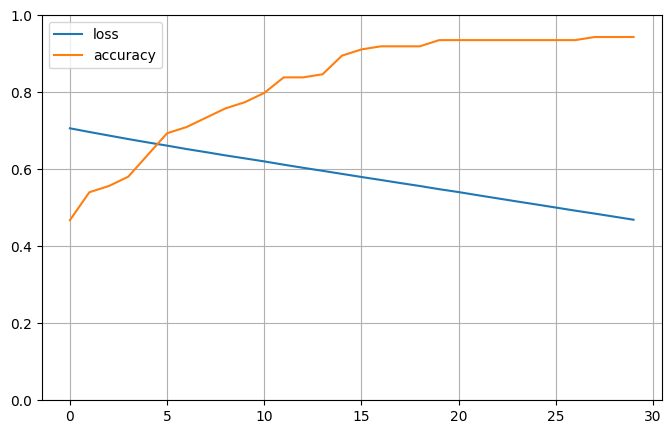

In [17]:
metrics = full_metrics.copy()
metrics = metrics.drop(['true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'precision', 'recall'], axis=1)

pd.DataFrame(metrics).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Graph from activation function: softmax


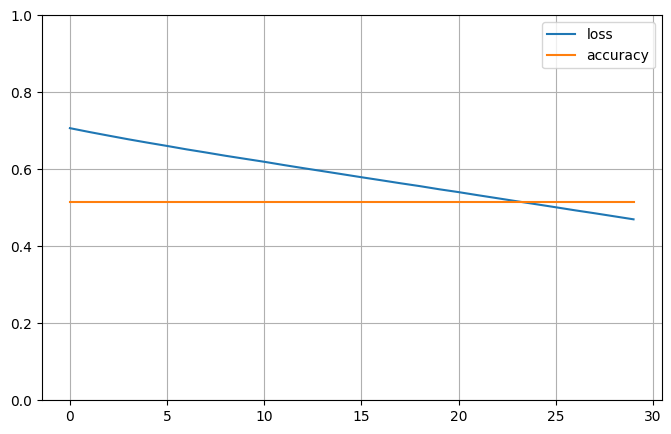

Graph from activation function: sigmoid


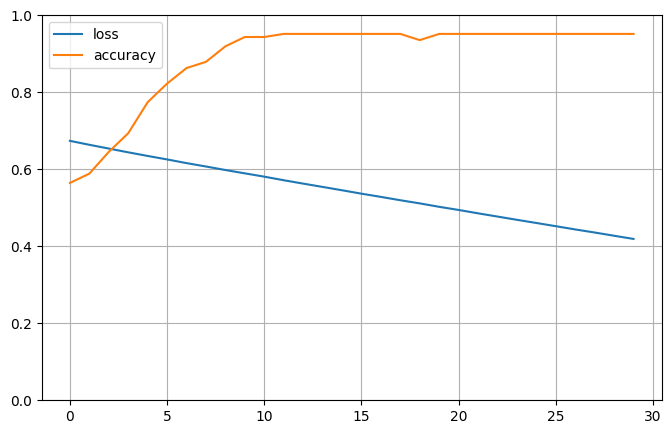

Graph from activation function: relu


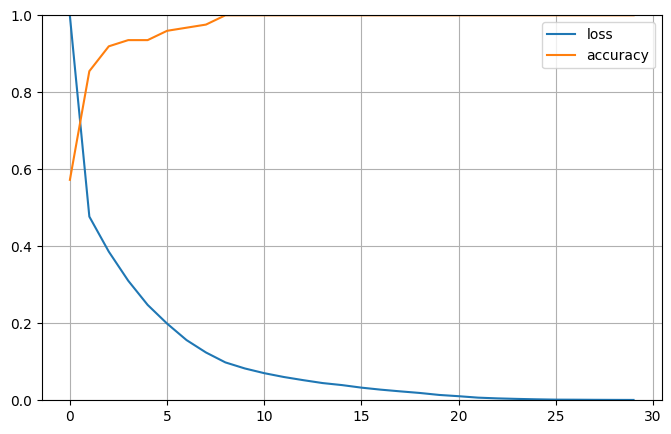

Graph from activation function: softplus


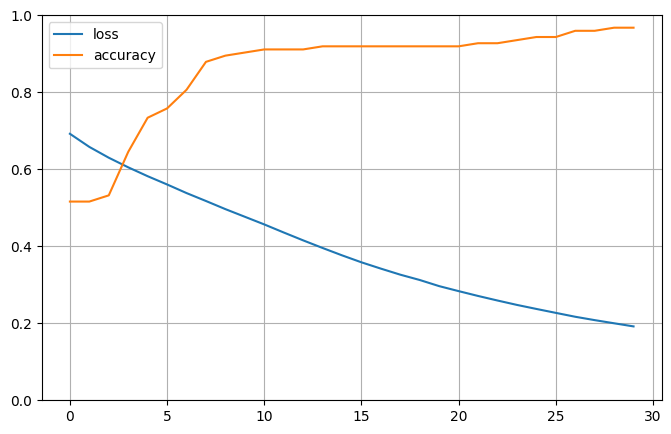

Graph from activation function: softsign


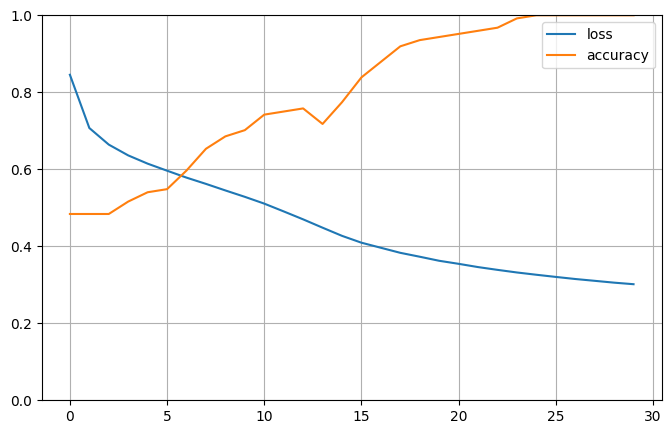

Graph from activation function: tanh


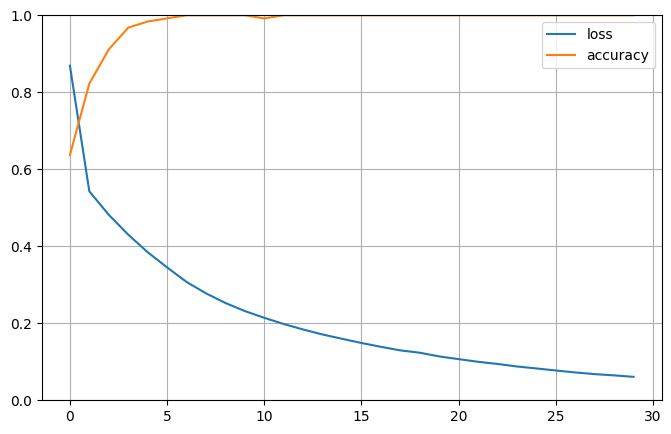

Graph from activation function: selu


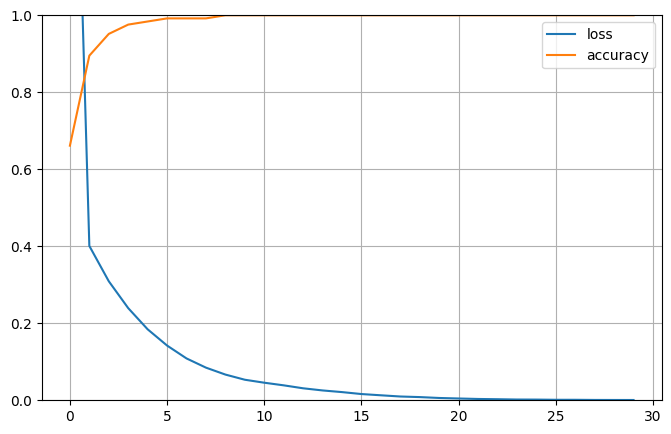

Graph from activation function: elu


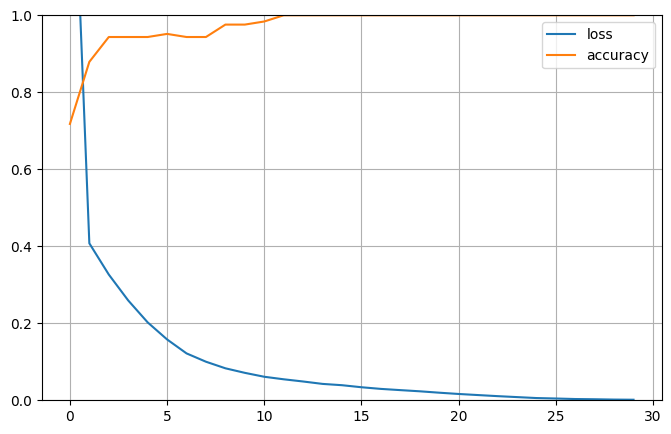

Graph from activation function: exponential


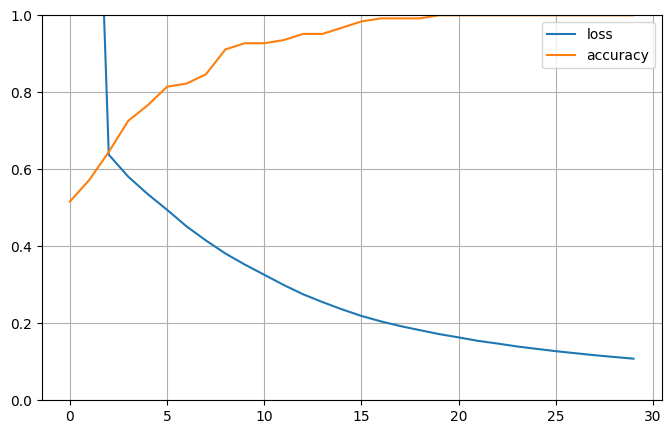

In [10]:
def testFinalLayerActivation():
    activations = ["softmax", "sigmoid", "relu", "softplus", "softsign", "tanh", "selu", "elu", "exponential"]
    for act in activations:
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[9, 9]),
            keras.layers.Dense(300, activation="relu"),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(1, activation=act)     # Need to reduce to one unit in end as we can only have one output
        ])

        keras.backend.clear_session()
        np.random.seed(42)
        tf.random.set_seed(42)

        model.compile(loss=keras.losses.BinaryCrossentropy(),       # BinaryCrossentropy over categorical crossentropy becase the class is binary
              optimizer=keras.optimizers.SGD(learning_rate=0.01), #"sgd" simply means that we will train the model using simple Stochastic Gradient Descent
              metrics=["accuracy", keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives(), keras.metrics.Precision(), keras.metrics.Recall()])
            
        history = model.fit(X_train, y_train, epochs=30, verbose=0,
                    validation_data=(X_valid, y_valid))

        full_metrics = pd.DataFrame(data=history.history)
        full_metrics = full_metrics[full_metrics.columns.drop(list(full_metrics.filter(regex="val_")))] # Remove fields with prefix val_
        
        metrics = full_metrics.copy()
        metrics = metrics.drop(['true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'precision', 'recall'], axis=1)

        pd.DataFrame(metrics).plot(figsize=(8, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 1)
        print(f"Graph from activation function: {act}")
        plt.show()

testFinalLayerActivation()

Graph from optimization : sgd


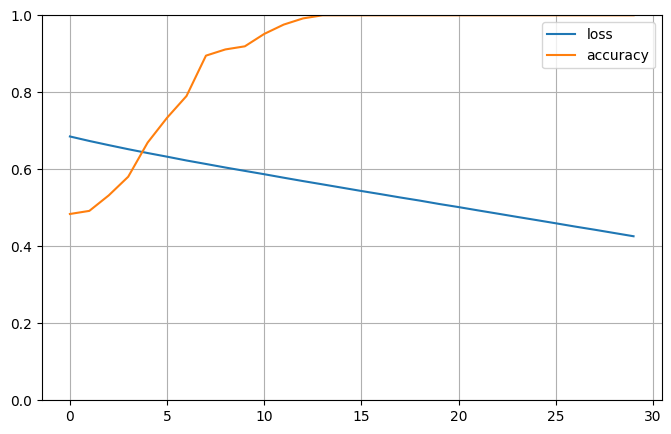

Graph from optimization : rmsprop


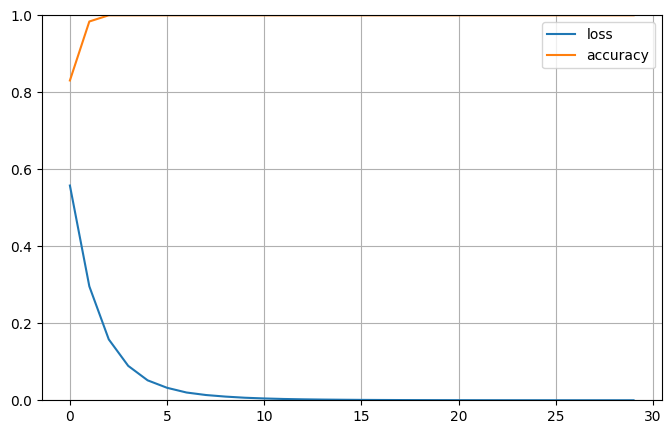

Graph from optimization : adam


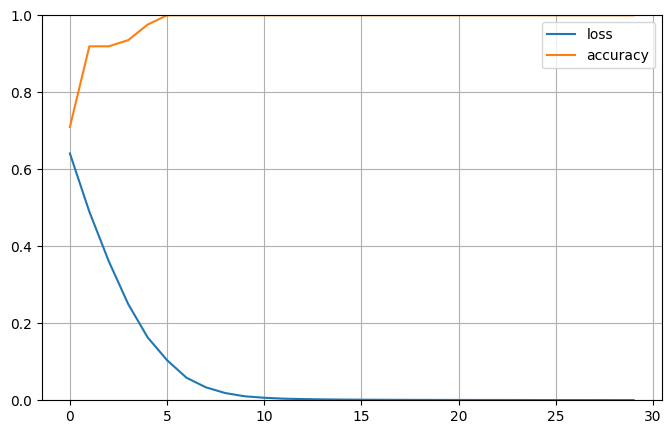

Graph from optimization : adadelta


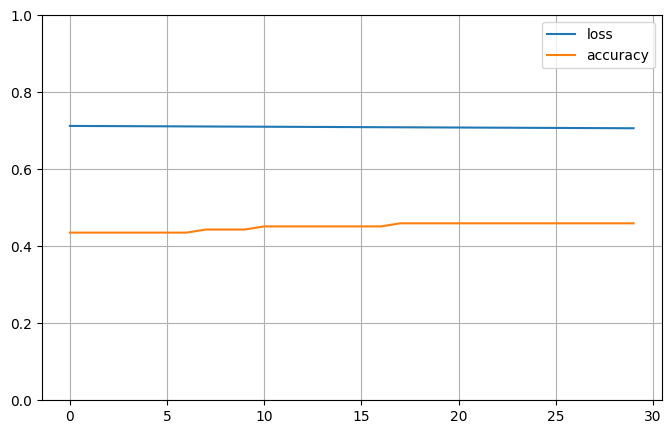

Graph from optimization : adagrad


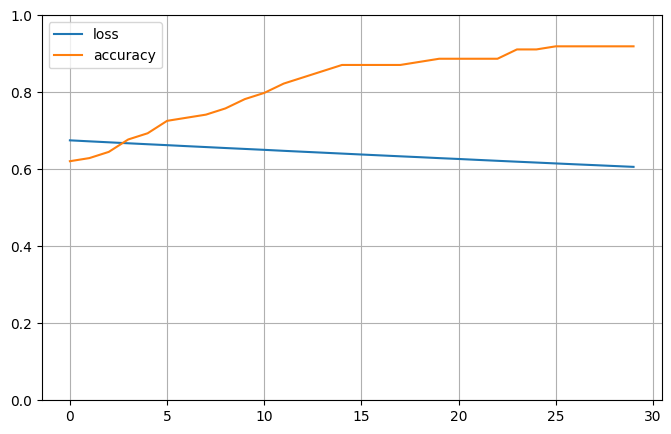

Graph from optimization : adamax


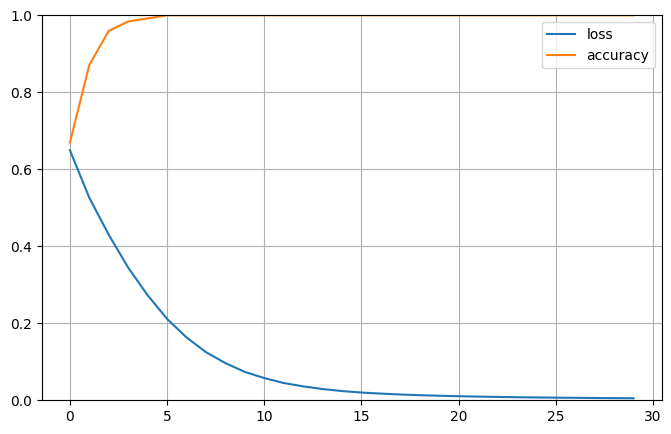

Graph from optimization : nadam


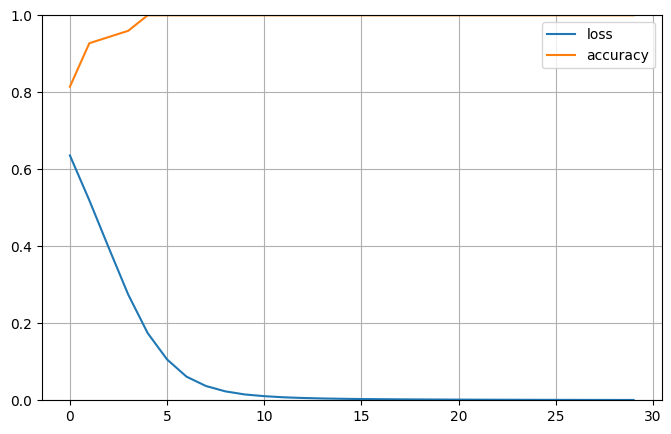

Graph from optimization : ftrl


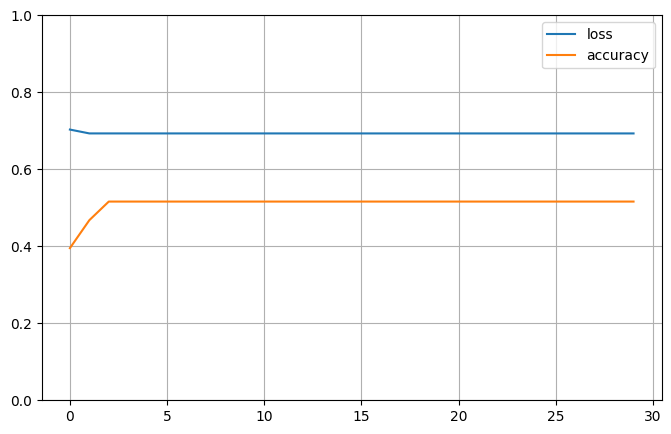

In [19]:
def testOpts():
    optimizers = ["sgd", "rmsprop", "adam", "adadelta", "adagrad", "adamax", "nadam", "ftrl"]
    for opt in optimizers:
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[9, 9]),
            keras.layers.Dense(300, activation="relu"),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(1, activation="sigmoid")     # Need to reduce to one unit in end as we can only have one output
        ])

        keras.backend.clear_session()
        np.random.seed(42)
        tf.random.set_seed(42)

        model.compile(loss=keras.losses.BinaryCrossentropy(),       # BinaryCrossentropy over categorical crossentropy becase the class is binary
              optimizer=opt,
              metrics=["accuracy", keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives(), keras.metrics.Precision(), keras.metrics.Recall()])
            
        history = model.fit(X_train, y_train, epochs=30, verbose=0,
                    validation_data=(X_valid, y_valid))

        full_metrics = pd.DataFrame(data=history.history)
        full_metrics = full_metrics[full_metrics.columns.drop(list(full_metrics.filter(regex="val_")))] # Remove fields with prefix val_
        
        metrics = full_metrics.copy()
        metrics = metrics.drop(['true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'precision', 'recall'], axis=1)

        pd.DataFrame(metrics).plot(figsize=(8, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 1)
        print(f"Graph from optimization : {opt}")
        plt.show()
    
testOpts()

## Lab 10

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [24]:
X = np.load('./data/smiley_X.npy')
y = np.load('./data/smiley_y.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y)

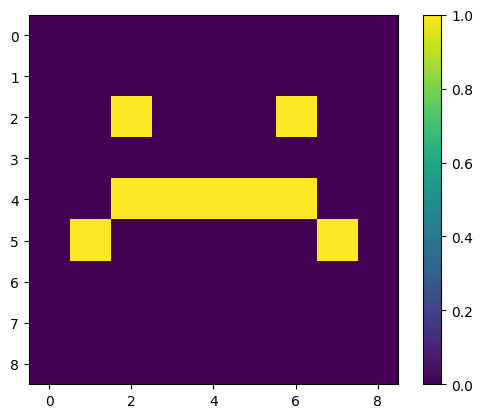

In [25]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
X_train.shape

(108, 9, 9, 1)

In [27]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

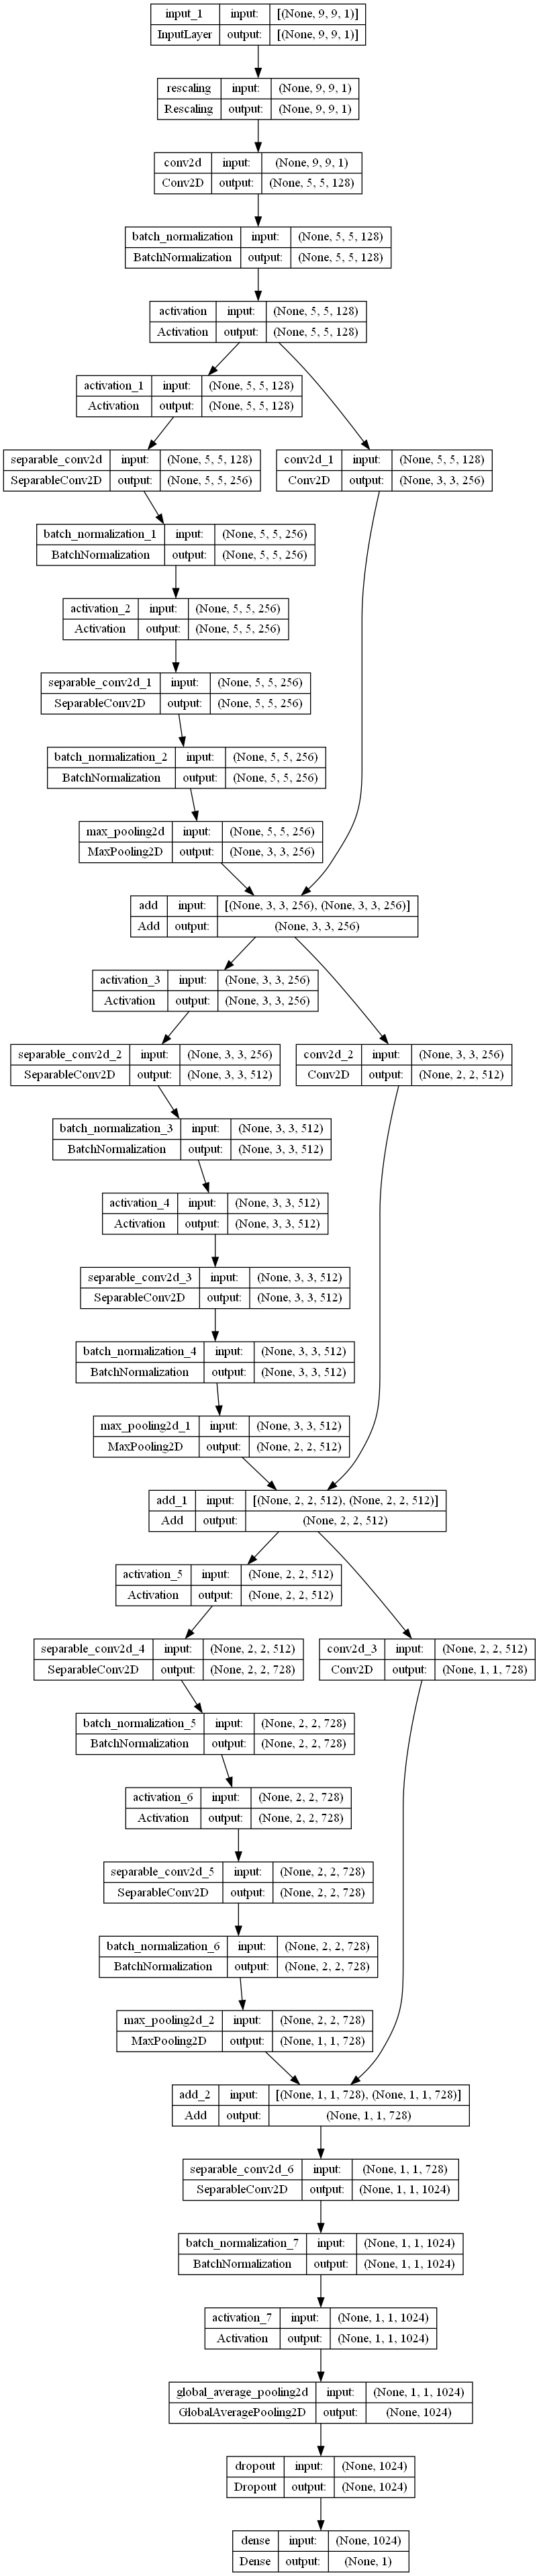

In [74]:
image_size = (9, 9)
batch_size = 108

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = data_augmentation(inputs)
    x = keras.layers.Rescaling(1.0 / 255)(inputs)
    x = keras.layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = keras.layers.Activation("relu")(x)
        x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.Activation("relu")(x)
        x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)

        x = keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation("relu")(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (1,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [75]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Compile and Fit the model, 5 epochs was found to be more than enough for 100% accuracy

In [76]:
epochs = 5

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives(), keras.metrics.Precision(), keras.metrics.Recall()],
)

history = model.fit(X_train, y_train, epochs=epochs)

Epoch 1/5
4/4 [==============================] - 1s 27ms/step - loss: 0.6400 - accuracy: 0.7315 - true_positives: 37.0000 - true_negatives: 42.0000 - false_positives: 12.0000 - false_negatives: 17.0000 - precision: 0.7551 - recall: 0.6852
Epoch 2/5
4/4 [==============================] - 0s 29ms/step - loss: 0.1194 - accuracy: 1.0000 - true_positives: 54.0000 - true_negatives: 54.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 3/5
4/4 [==============================] - 0s 27ms/step - loss: 3.0627e-04 - accuracy: 1.0000 - true_positives: 54.0000 - true_negatives: 54.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 4/5
4/4 [==============================] - 0s 28ms/step - loss: 2.8274e-04 - accuracy: 1.0000 - true_positives: 54.0000 - true_negatives: 54.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00 - precision: 1.0000 - recall: 1.0000
Epoch 5/5
4/4 [===

Show Metrics

In [78]:
full_metrics = pd.DataFrame(data=history.history)
full_metrics = full_metrics[full_metrics.columns.drop(list(full_metrics.filter(regex="val_")))] # Remove fields with prefix val_
full_metrics

,loss,accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall
0,0.639958,0.731481,37.0,42.0,12.0,17.0,0.755102,0.685185
1,0.119420,1.000000,54.0,54.0,0.0,0.0,1.000000,1.000000
2,0.000306,1.000000,54.0,54.0,0.0,0.0,1.000000,1.000000
3,0.000283,1.000000,54.0,54.0,0.0,0.0,1.000000,1.000000
4,0.000059,1.000000,54.0,54.0,0.0,0.0,1.000000,1.000000


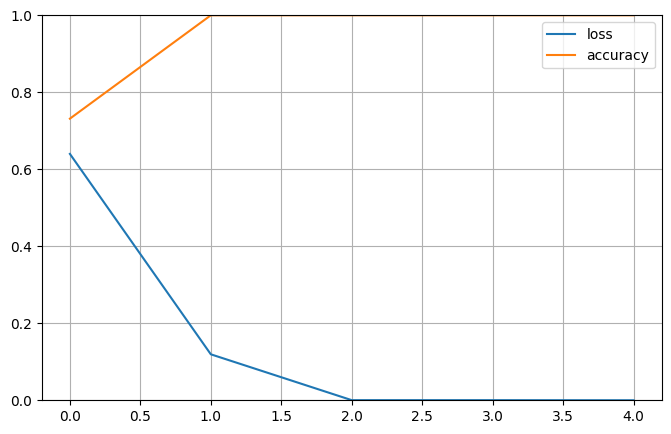

In [79]:
metrics = full_metrics.copy()
metrics = metrics.drop(['true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'precision', 'recall'], axis=1)

pd.DataFrame(metrics).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Loss-Accuracy graph shows 100% accuracy after 1 epoch. This is because of the simple dataset used.